In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import ic

In [2]:
nome_dos_arquivos = ic.get_file_names()
numero_de_arquivos = len(nome_dos_arquivos)
nome_dos_arquivos = nome_dos_arquivos[0:7] + nome_dos_arquivos[8:13] + [nome_dos_arquivos[14]]
numero_de_arquivos = numero_de_arquivos -4

In [3]:
def get_normalized_distance_matrix_of_embeddings(emb):
    vectors = []
    for key in emb:
        vectors += [emb[key]['vectors'][key]]
    dm = distance_matrix(vectors,vectors)
    dm = dm/np.max(dm)
    return dm

In [4]:
def get_vectors_from_embedding(emb):
    vec_emb_crawl = []
    for key in emb:
        vec_emb_crawl += [emb[key]['vectors'][key]]
    return vec_emb_crawl

In [5]:
embbeding_distance_matrix_heat_map = np.zeros((numero_de_arquivos,numero_de_arquivos))

In [6]:
numero_de_arquivos

11

In [7]:
embbedings_distance = []
for i in range(numero_de_arquivos+2):
    if i != 7 and i!=14:
        emb = ic.get_embedding(i)
        embbedings_distance += [get_normalized_distance_matrix_of_embeddings(emb)]
for i in range(numero_de_arquivos):
    for j in range(numero_de_arquivos):
        embbeding_distance_matrix_heat_map[i][j] = np.sqrt(np.sum((embbedings_distance[i] - embbedings_distance[j])**2))

In [8]:
ic.get_file_names()

['glove.twitter.27B.50d.txt.pickle',
 'glove.840B.300d.txt.pickle',
 'glove.twitter.27B.200d.txt.pickle',
 'GoogleNews-vectors-negative300.bin.pickle',
 'glove.6B.200d.txt.pickle',
 'glove.42B.300d.txt.pickle',
 'glove.6B.300d.txt.pickle',
 'wiki-news-300d-1M-subword.vec.pickle',
 'glove.twitter.27B.100d.txt.pickle',
 'glove.6B.50d.txt.pickle',
 'glove.6B.100d.txt.pickle',
 'wiki-news-300d-1M.vec.pickle',
 'glove.twitter.27B.25d.txt.pickle',
 'crawl-300d-2M-subword.vec.pickle',
 'crawl-300d-2M.vec.pickle']

In [9]:
nomes_apresentaveis = ["Glove Twitter", "Glove Crawler 840B", "Google Vectors", "Glove Crawler 6B", "Glove Crawler 42B", "Glove Twitter 27B", "Facebook Fasttext", "Facebook Fasttext Wiki", "Google Crawl 2M", "Google SubWord", "Glove Subword" ]

In [10]:
len(nomes_apresentaveis)

11

In [130]:
len(embbeding_distance_matrix_heat_map)

11

In [154]:
%matplotlib qt

In [18]:
fig, ax = plt.subplots(figsize=(11,11))
im = ax.imshow(embbeding_distance_matrix_heat_map)

# We want to show all ticks...
ax.set_xticks(np.arange(len(nomes_apresentaveis)))
ax.set_yticks(np.arange(len(nomes_apresentaveis)))
# ... and label them with the respective list entries
ax.set_xticklabels([(a) for i,a in enumerate(nomes_apresentaveis)])
ax.set_yticklabels([(a) for i,a in enumerate(nomes_apresentaveis)],fontsize=14)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(nomes_apresentaveis)):
    for j in range(len(nomes_apresentaveis)):
        text = ax.text(j, i, round(embbeding_distance_matrix_heat_map[i, j],2),
                       ha="center", va="center", color="w", fontsize=13)
fig.tight_layout()
ax.set_title("Distance between Models (9.3% error for every 4 points of distance)")
plt.show()


### GLOVE twitter (50,100,200) [0,8,2]

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [29]:
pca4 = PCA(n_components=4)
pca3 = PCA(n_components=3)
pca2 = PCA(n_components=2)

In [38]:
emb_crawl50 = ic.get_embedding(11)
emb_crawl100 = ic.get_embedding(8)
emb_crawl200 = ic.get_embedding(2)

In [39]:

vec_a = get_vectors_from_embedding(emb_crawl50)
vec_b = get_vectors_from_embedding(emb_crawl100)
vec_c = get_vectors_from_embedding(emb_crawl200)

In [23]:
%matplotlib inline

In [ ]:
ic.visualize3d

In [24]:
%matplotlib qt

In [25]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(vec_emb_crawl)

NameError: name 'vec_emb_crawl' is not defined

In [26]:
#Fitting the PCA algorithm with our Data


In [33]:
pca_50 = PCA().fit(vec_a)#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_50.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()
pca_50 = PCA().fit_transform(vec_a)#Plotting the Cumulative Summation of the Explained Variance


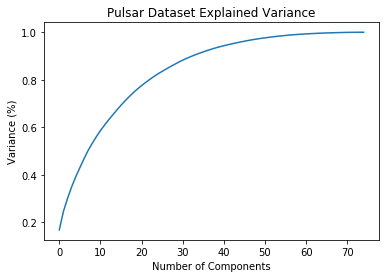

In [45]:
pca_100 = PCA().fit(vec_b)#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_100.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()
pca_100 = PCA().fit_transform(vec_b)#Plotting the Cumulative Summation of the Explained Variance


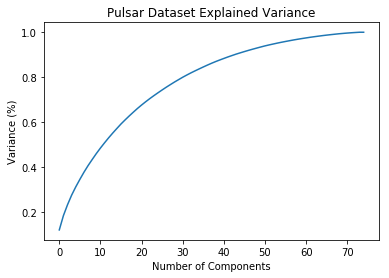

In [56]:
pca_200 = PCA(svd_solver='full').fit(vec_c)#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_200.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()
pca_200 = PCA().fit_transform(vec_c)#Plotting the Cumulative Summation of the Explained Variance


### Matriz de Distância após PCA

In [165]:
original_distance_matrix = distance_matrix(vec_a,vec_a)
original_distance_matrix = original_distance_matrix/np.max(original_distance_matrix)

/home/kaue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


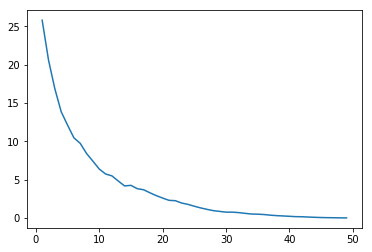

In [166]:
erros = []
for i in range(50):
    res = PCA(n_components=i).fit_transform(vec_a)
    distance_matrix_res = distance_matrix(res,res)
    distance_matrix_res = distance_matrix_res/np.max(distance_matrix_res)
    erros += [np.sqrt(np.sum((distance_matrix_res - original_distance_matrix)**2))]
plt.plot(erros)

In [85]:
res = PCA(n_components=10).fit_transform(vec_b)


In [87]:
distance_matrix_res = distance_matrix(res,res)

In [88]:
np.max(distance_matrix_res)

8.957991037265511

nan


/home/kaue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


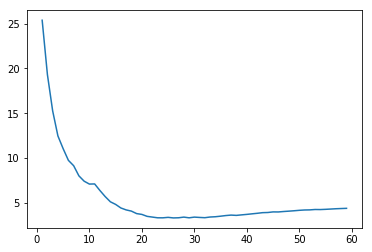

In [89]:
erros = []
for i in range(60):
    res = PCA(n_components=i).fit_transform(vec_b)
    distance_matrix_res = distance_matrix(res,res)
    distance_matrix_res = distance_matrix_res/np.max(distance_matrix_res)
    erros += [np.sqrt(np.sum((distance_matrix_res - original_distance_matrix)**2))]
plt.plot(erros)
print(np.min(erros))

/home/kaue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


nan


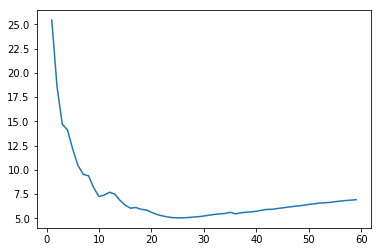

In [81]:
erros = []
for i in range(60):
    res = PCA(n_components=i).fit_transform(vec_c)
    distance_matrix_res = distance_matrix(res,res)
    distance_matrix_res = distance_matrix_res/np.max(distance_matrix_res)
    erros += [np.sqrt(np.sum((distance_matrix_res - original_distance_matrix)**2))]
plt.plot(erros)
print(np.min(erros))

In [36]:
sentiments = ic.get_sentiments()

### Visualizacao 3D  com PCA Aplicado

In [48]:
%matplotlib qt

In [45]:
emb_crawl50 = ic.get_embedding(11)

vec_a = get_vectors_from_embedding(emb_crawl50)

In [46]:
ic.visualize3d(pca_50[:,0],pca_50[:,1],pca_50[:,2],sentiments, title="50 dimensoes")

In [32]:
ic.visualize3d(pca_100[:,0],pca_100[:,1],pca_100[:, 3],sentiments, title="100 dimensoes")

NameError: name 'pca_100' is not defined

In [51]:
ic.visualize3d(pca_200[:,0],pca_200[:,3],pca_200[:,2],sentiments, title="200 dimensoes")

Traceback (most recent call last):
  File "/home/kaue/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_qt5.py", line 519, in _draw_idle
    self.draw()
  File "/home/kaue/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 402, in draw
    self.figure.draw(self.renderer)
  File "/home/kaue/anaconda3/lib/python3.7/site-packages/matplotlib/artist.py", line 50, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/home/kaue/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py", line 1649, in draw
    renderer, self, artists, self.suppressComposite)
  File "/home/kaue/anaconda3/lib/python3.7/site-packages/matplotlib/image.py", line 138, in _draw_list_compositing_images
    a.draw(renderer)
  File "/home/kaue/anaconda3/lib/python3.7/site-packages/matplotlib/artist.py", line 50, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/home/kaue/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3

In [ ]:
ic.visualize3d(pca_emb_crawl[:,3],pca_emb_crawl[:,1],pca_emb_crawl[:,2],sentiments, title="Crawl 0 fora")

In [ ]:
ic.visualize3d(pca_emb_subword[:,0],pca_emb_subword[:,1],pca_emb_subword[:,2],sentiments, title="Subword")

In [10]:
sentiments = ic.get_sentiments()

### Visualizacao do PCA3

In [12]:
%matplotlib qt

In [164]:
for i in range(10,14):
    vec_a = get_vectors_from_embedding(ic.get_embedding(i))
    pca3_emb_crawl = pca3.fit_transform(vec_a)
    ic.visualize3d(pca3_emb_crawl[:,0],pca3_emb_crawl[:,1],pca3_emb_crawl[:,2],sentiments, title="Facebook FastText",text_size=11)

In [192]:
import ic

In [ ]:
pca2_emb_crawl

In [ ]:
plt.scatter(pca2_emb_crawl[:,0],pca2_emb_crawl[:,1])

In [140]:
resp = 0
for j in range(100):
    a = np.random.random([75,75])
    b = np.random.random([75,75])
    for i in range(len(a)):
        a[i][i] = 0
        b[i][i] = 0
    resp += np.sqrt(np.sum((a-b)**2))
print(resp/100)

30.42232080680964


In [162]:
erro = []
for k in np.arange(0,0.5,0.05):
    resp = 0
    for j in range(100):
        a = np.random.random([75,75])
        b = a + np.random.random([75,75])*k
        for i in range(len(a)):
            a[i][i] = 0
            b[i][i] = 0
        resp += np.sqrt(np.sum((a-b)**2))
    resp = resp/100
    erro += [[k,resp]]
erro = np.asarray(erro)

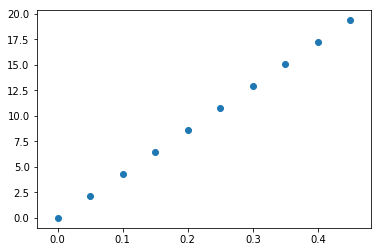

In [163]:
plt.scatter(erro[:,0],erro[:,1])

In [158]:
erro

array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e-02, 4.30241442e-01],
       [2.00000000e-02, 8.59475951e-01],
       [3.00000000e-02, 1.29121471e+00],
       [4.00000000e-02, 1.72037720e+00],
       [5.00000000e-02, 2.15363226e+00],
       [6.00000000e-02, 2.57999254e+00],
       [7.00000000e-02, 3.01039340e+00],
       [8.00000000e-02, 3.44088382e+00],
       [9.00000000e-02, 3.87277408e+00],
       [1.00000000e-01, 4.30245863e+00],
       [1.10000000e-01, 4.73057044e+00],
       [1.20000000e-01, 5.16700540e+00],
       [1.30000000e-01, 5.59562848e+00],
       [1.40000000e-01, 6.02032254e+00],
       [1.50000000e-01, 6.45418469e+00],
       [1.60000000e-01, 6.87795408e+00],
       [1.70000000e-01, 7.30772007e+00],
       [1.80000000e-01, 7.74605902e+00],
       [1.90000000e-01, 8.17298536e+00],
       [2.00000000e-01, 8.60589155e+00],
       [2.10000000e-01, 9.02365587e+00],
       [2.20000000e-01, 9.45709242e+00],
       [2.30000000e-01, 9.89358402e+00],
       [2.400000